In [ ]:
# Перед началом работы с библиотеками pandas и seaborn необходимо установить их в Python.
# Сделать это можно, исполнив данную ячейку
!pip3 install pandas
!pip3 install seaborn

In [14]:
import math

import pandas as pd
import seaborn as sns

In [15]:
# Настройка, которая позволяет сделать графики, которые рисует seaborn, более крупными
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [3]:
def round_to_2(x):
    """
    Принимает число и возвращает результат его округления
    до 2 знаков после запятой.
    
    Аргументы:
        x: Число.
        
    Возвращаемое значение:
        Результат округления числа до 2 знаков после запятой.
    """
    
    return round(x, 2)

## Среднее значение в колонке csv-файла

In [4]:
def split_line(line, sep):
    """
    Возвращает список значений, которые содержатся в строке
    и разделены конкретным разделителем.
    Если какое-то из значений обособлено кавычками ("<значение>"), то разделительный
    символ внутри него не считается разделителем.
    
    Например, если передать в функцию строку 'aa,bb,"cc, oo",dd' и разделитель ',',
    то в результате работы функции получится список ['aa', 'bb', 'cc, oo', 'dd'].
    
    Аргументы:
        line: Строка, которую нужно разбить на подстроки.
        sep: Разделитель, который используется в строке для отделения различных значений.
        
    Возвращаемое значение:
        Список подстрок строки, получаемых с помощью разделения её
        на подстроки по заданному разделителю.
    """
    
    res = []
    
    prev_ind = -1
    in_quotes = False
    
    for i in range(len(line)):
        ch = line[i]
        
        if ch == '"':
            in_quotes = not in_quotes
            
        if not in_quotes and ch == sep:
            res.append(line[prev_ind + 1:i].strip('"'))
            prev_ind = i
            
    if prev_ind < len(line) - 1:
        res.append(line[prev_ind + 1:len(line)].strip('"'))
    elif prev_ind == len(line) - 1:
        res.append('')
    
    return res

In [11]:
def read_csv_and_calc_mean_solution(lines, sep, column_name):
    a = []
    for i in lines:
        #print(split_line(i, sep))
        a.append(split_line(i, sep))

    ind = a[0].index(column_name)

    summ = 0
    for i in range(1, len(a)):
        summ += int(a[i][ind])
    print(round_to_2(summ / (len(a) - 1)))

        

In [12]:
def read_csv_and_calc_mean_tests():
    example_1_lines = [
        'Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства',
        'Боевик,0,36,Италия,1996',
        'Комедия,1,23,Россия,1999',
        'Триллер,2,21,США,2006',
    ]
    example_1_sep = ','
    example_1_column = 'Год производства'
    example_1_res = 2000.33
    
    assert read_csv_and_calc_mean_solution(example_1_lines, example_1_sep, example_1_column) == example_1_res
    
    example_2_lines = [
        'Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства',
        'Боевик,0,36,Италия,1996',
        'Комедия,1,23,Россия,1999',
        'Триллер,2,21,США,2006',
        'Комедия,1,48,США-Россия,2012',
        'Драма,2,3,Франция,2016',
        'Документальный,2,47,Германия,2001'
    ]
    example_2_sep = ','
    example_2_column = 'Продолжительность, минуты'
    example_2_res = 29.67
    
    assert read_csv_and_calc_mean_solution(example_2_lines, example_2_sep, example_2_column) == example_2_res
    
    print('Все тесты прошли успешно!')

In [13]:
read_csv_and_calc_mean_tests()

2000.33


AssertionError: 

## Фильтрация таблиц

In [24]:
# В переменную movies загружена таблица из файла movies_data.csv
movies = pd.read_csv('movies_data.csv', sep=',')

# Удаление фильмов, у которых не указан год производства
movies = movies[~movies['Год производства'].isna()]

movies = movies[((movies['Год производства'] < 2000) & (movies['Жанр'] == 'Триллер')) | (movies['Страна производства'] == 'Россия')]
print(len(movies))

3299


## Комбинирование колонок и расчёт статистик

In [28]:
# В переменную movies_budget загружена таблица из файла movies_budget.csv
movies_budget = pd.read_csv('movies_budget.csv', sep=';')

movies_budget['Доход'] = movies_budget['Стоимость билета'] * movies_budget['Число зрителей']

movies_budget['Прибль'] = movies_budget['Доход'] / 2 - movies_budget['Бюджет'] - movies_budget['Бюджет'] / 2

print(round_to_2(movies_budget['Прибль'].max()))

150431902.0


## Агрегированные статистики

In [50]:
# В переменную movies_budget загружена таблица из файла movies_budget.csv
movies_budget = pd.read_csv('movies_budget.csv', sep=';')



                        

transform_countries_info(movies_budget)




             Жанр  Россия
4         Триллер     305
2           Драма     290
0          Боевик     205
1  Документальный     100
3         Комедия     100


In [49]:
def transform_countries_info(movies_data):
    """
    Принимает таблицу с колонкой «Страна производства» и добавляет к таблице 5 новых колонок:
    по одной на каждую отдельную страну. Значение в каждой из колонок соответствует тому,
    принимала ли конкретная страна участие в производстве фильма.
    
    Аргументы:
        movies_data: Исходная таблица с клонкой «Страна производства».
        
    Возвращаемое значение:
        Нет. Функция модифицирует переданную таблицу, но ничего не возвращает.
    """
    
    countries = ['Россия', 'Германия', 'США', 'Италия', 'Франция']
    new_columns = [[] for i in range(len(countries))]
    
    for _, row in movies_data.iterrows():
        country_of_origin_united = row['Страна производства']
        countries_of_origin = country_of_origin_united.split('-')
        
        for i in range(len(countries)):
            country = countries[i]
            
            if country in countries_of_origin:
                new_columns[i].append('Да')
            else:
                new_columns[i].append('Нет')
                
    for i in range(len(countries)):
        movies_data[countries[i]] = new_columns[i]
        
    movies_data = movies_data.groupby('Жанр', as_index = False)
    movies_data = movies_data.aggregate({'Россия': 'count'})
    movies_data = movies_data.sort_values('Россия', ascending = False)
    print(movies_data)

## Визуальный анализ данных

<AxesSubplot: xlabel='C', ylabel='D'>

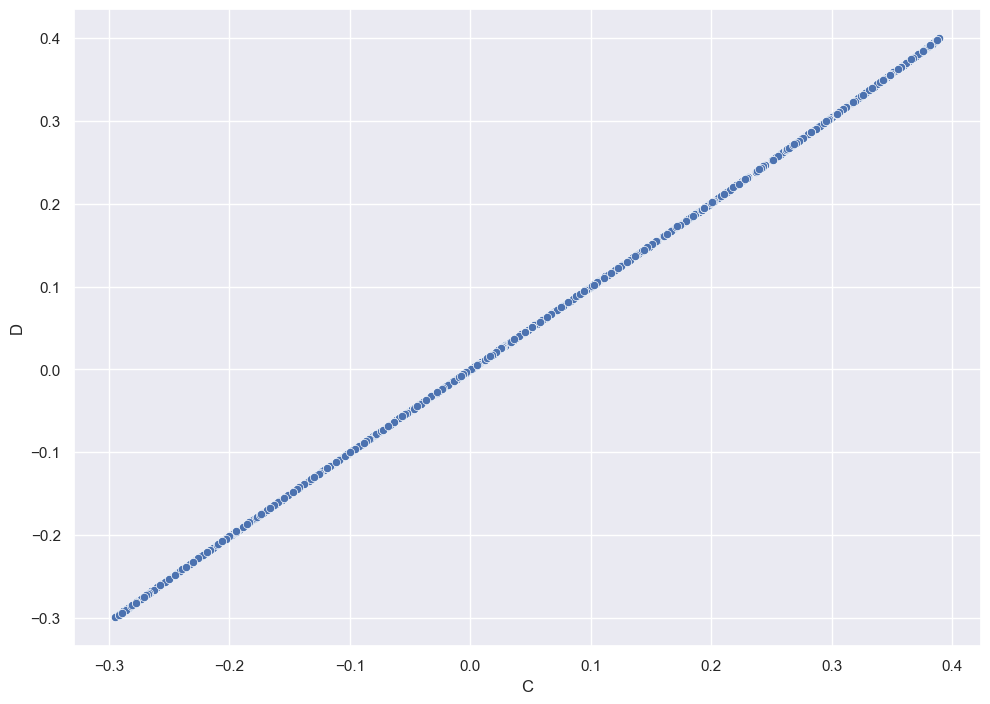

In [63]:
# В переменную many_factors загружена таблица из файла many_factors_data.csv
many_factors = pd.read_csv('many_factors_data.csv')

sns.scatterplot(x = many_factors['C'], y = many_factors['D'])

<AxesSubplot: xlabel='C', ylabel='Count'>

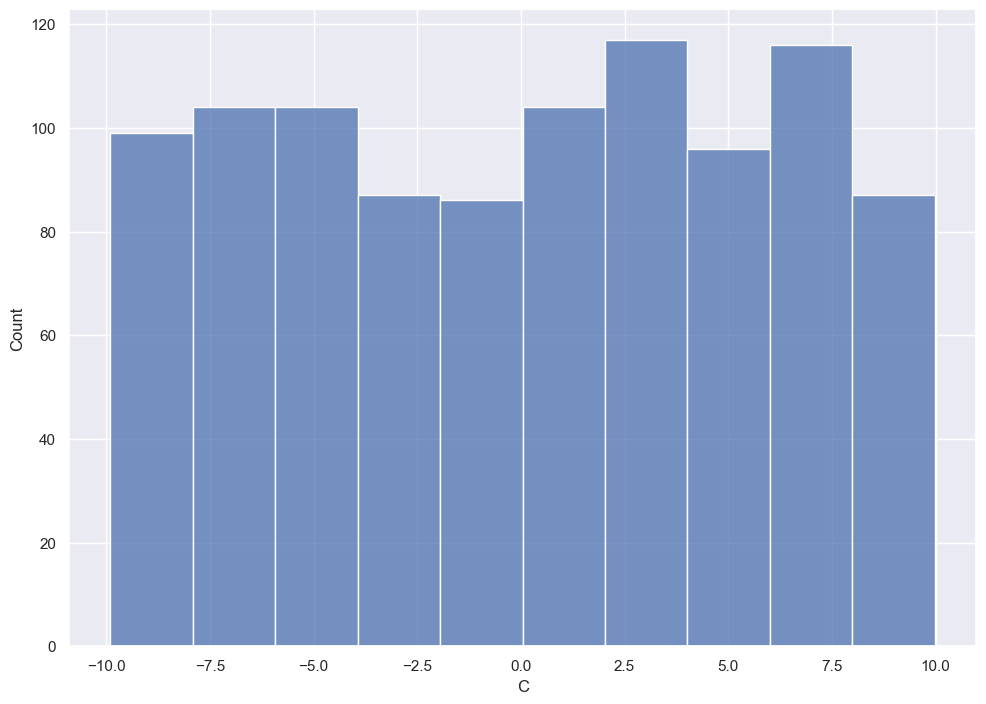

In [76]:
# В переменную uniform_and_not загружена таблица из файла uniform_and_not_data
uniform_and_not = pd.read_csv('uniform_and_not_data.csv')

sns.histplot(uniform_and_not['C'], bins = 10)